In [1]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.options.display.float_format = '{:.8f}'.format

## KMeans는 실제 거리 기반
- 알고리즘이 쉬움

In [5]:
df=pd.read_csv('C:/wine_test.csv')
df.columns                          # 컬럼 확인

Index(['Unnamed: 0', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [10]:
# Unnamed: 0와 class 를 제외한 데이터프레임 생성
df_sp=df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
       'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']]

### 스케일링

In [11]:
from sklearn.preprocessing import StandardScaler

df_sp.dropna(inplace=True)

C:\Users\KYW\AppData\Local\Temp\ipykernel_12736\36143879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp.dropna(inplace=True)


In [12]:
sc=StandardScaler()
df_scaled=sc.fit_transform(df_sp)
pd.DataFrame(df_scaled)
df_sc_sp=pd.DataFrame(df_scaled,columns=df_sp.columns)

In [20]:
kmeans=KMeans(n_clusters=3,random_state=111)
clusters=kmeans.fit(df_scaled)

c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
df_sc_sp['cluster']=clusters.labels_

## 군집 평가
1. 시각화
2. 엘보우 함수
3. 실루엣 계수
> 이 3가지를 기반으로 군집에 대한 기준과 개수 정하기 가능

### 데이터 분포에 대한 시각화

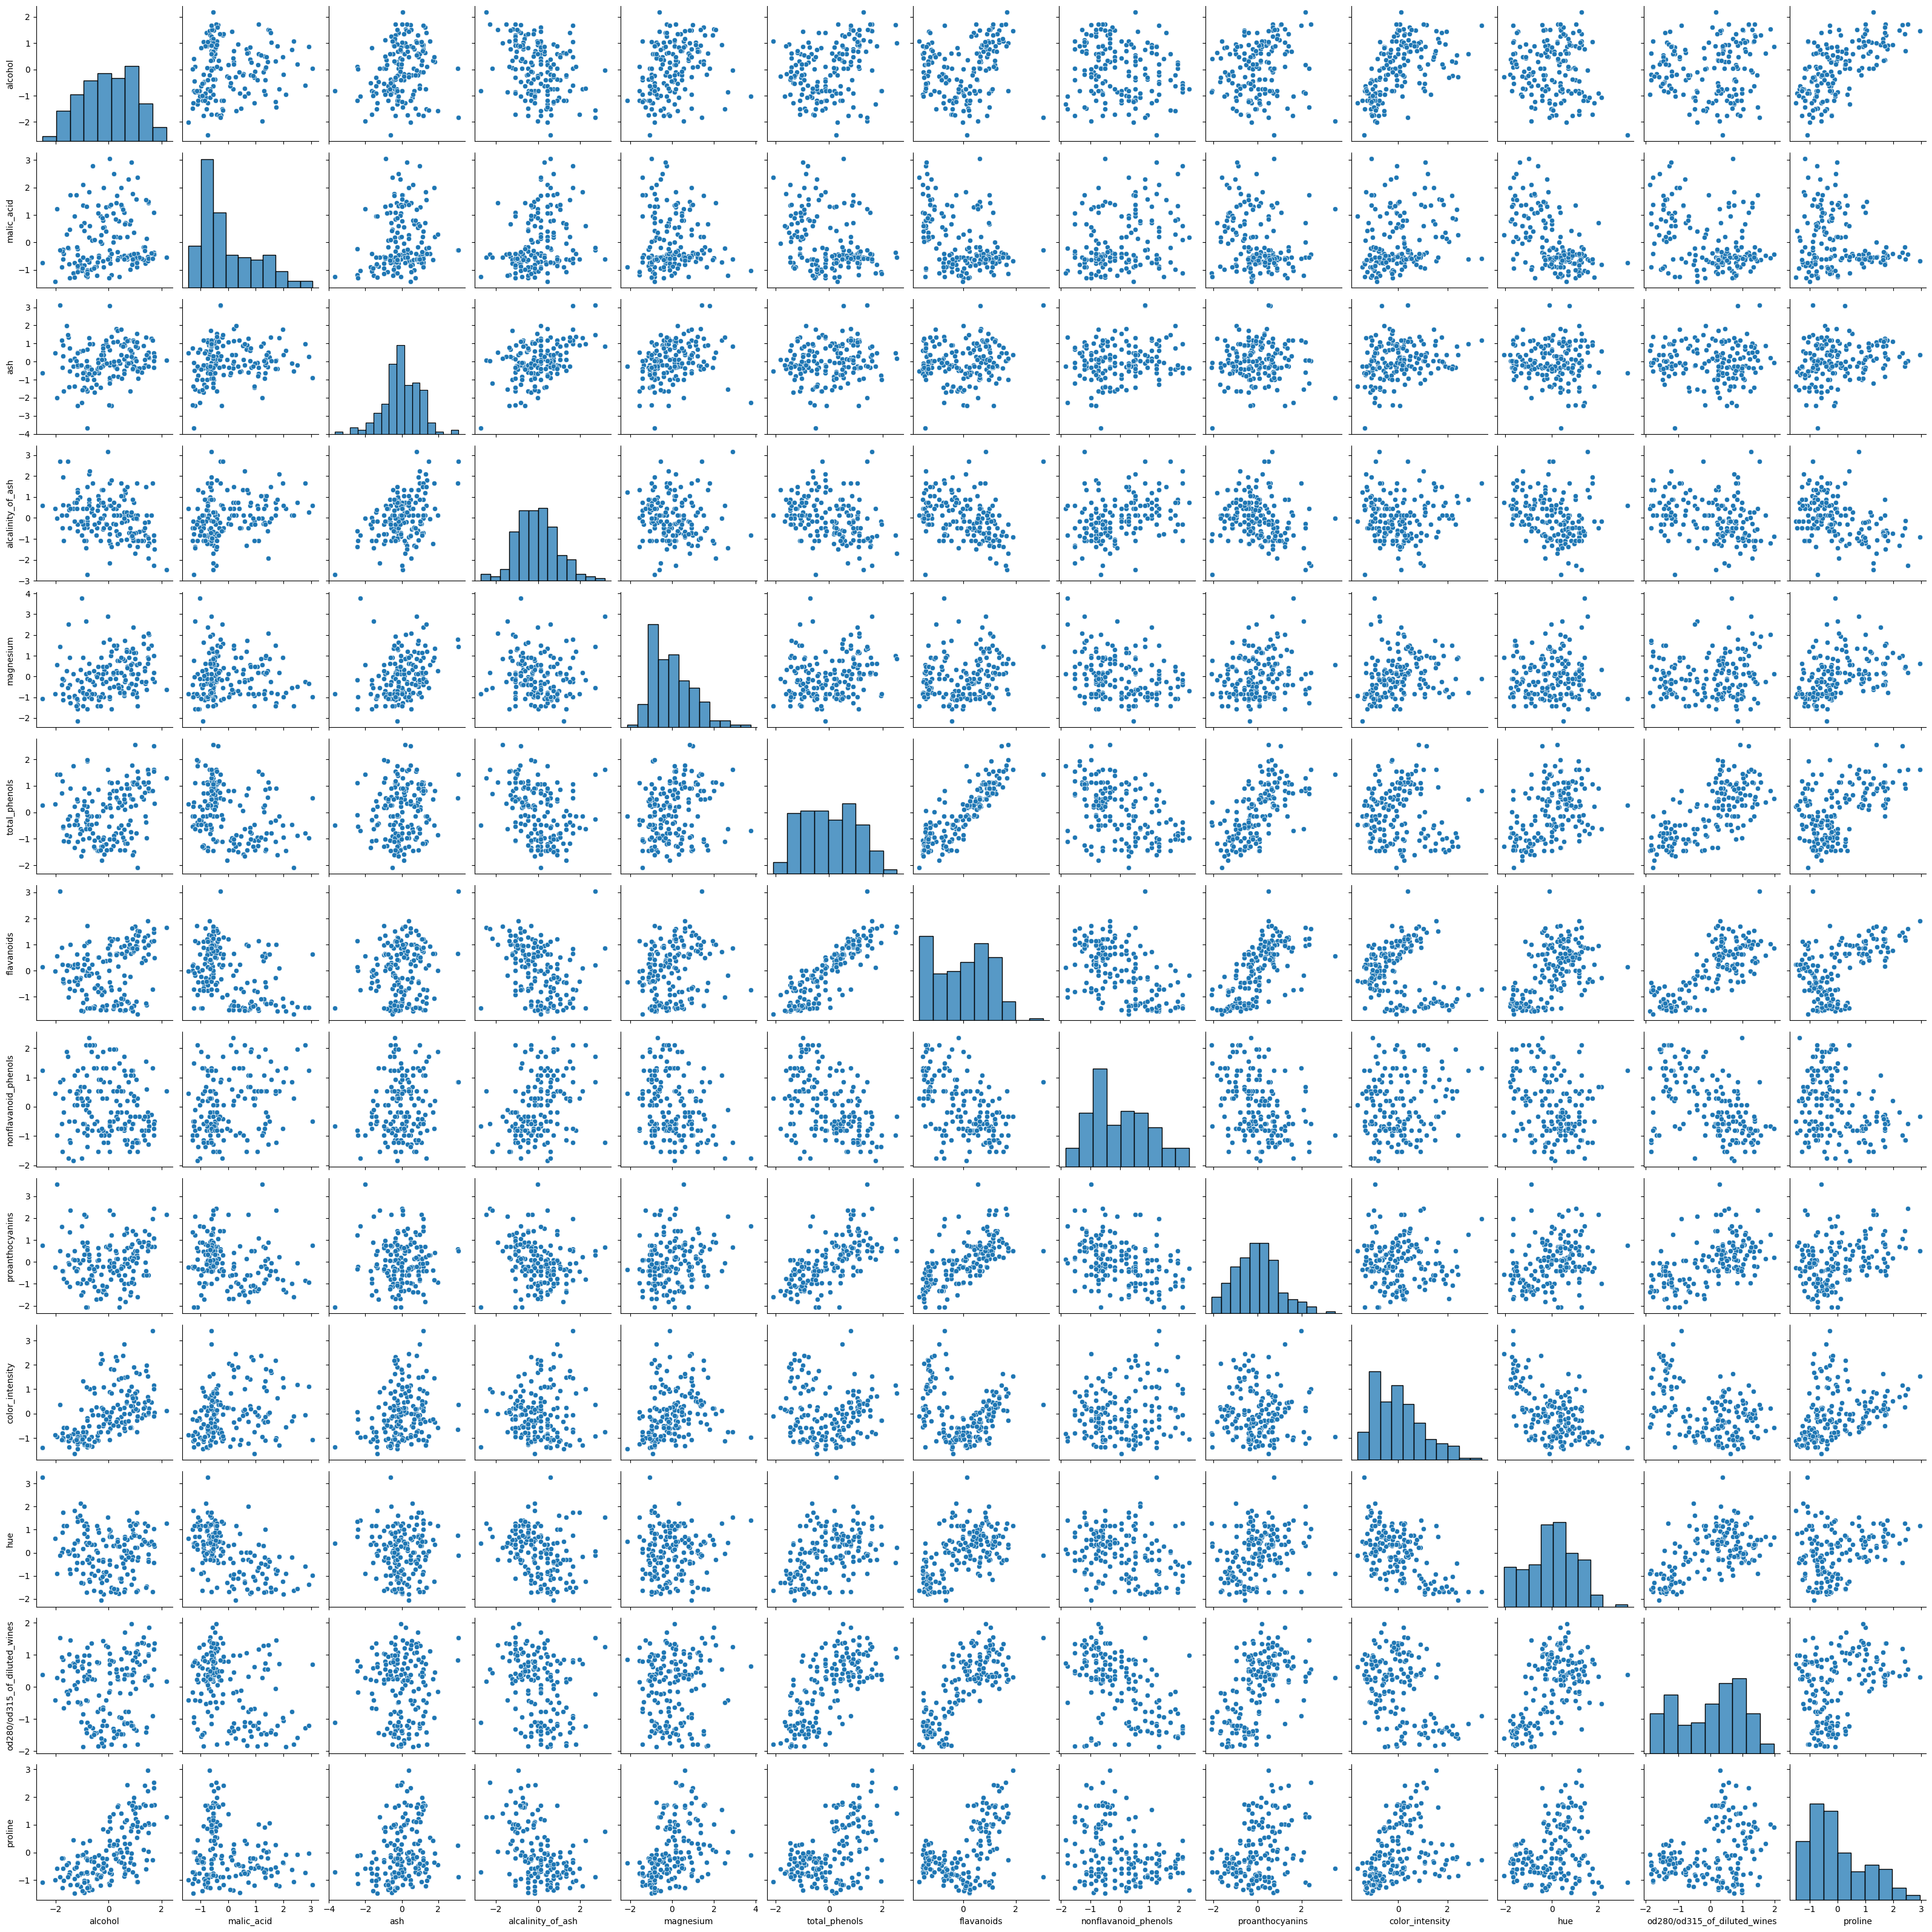

In [14]:
sns.pairplot(df_sc_sp)

> 어떤 컬럼을 선정할 것인지 정해야 함. 모든 컬럼을 다 사용하는 것은 안됨.

### 엘보우 함수: 군집에 대해 거리 기반으로 평가

c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1588.2201435101892
1218.002895939455
1121.5903343961145
1056.803586376963


c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

991.4849904402558
945.1170869310697
900.7661340078677


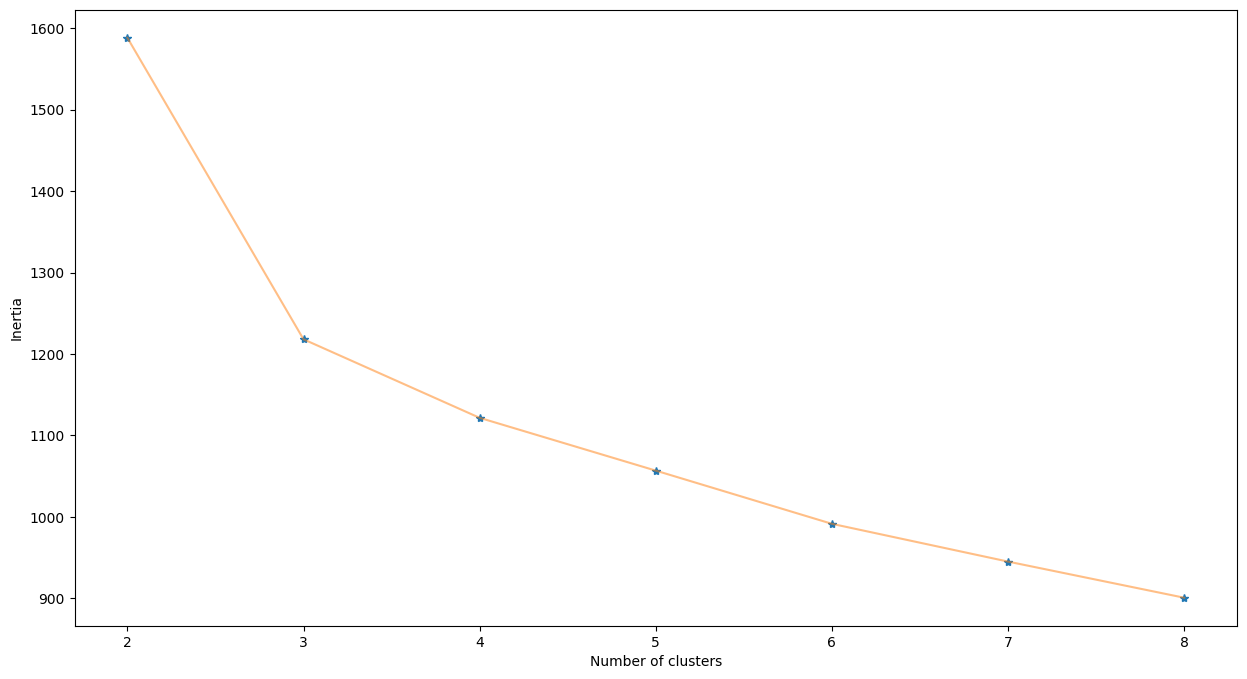

In [15]:
def change_n_clusters(n_clusters, data):
    sum_of_squared_distance=[]
    for n_cluster in n_clusters:
        kmeans = KMeans(n_clusters = n_cluster)
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)
        print(kmeans.inertia_)
        
    plt.figure(1, figsize=(15,8))
    plt.plot(n_clusters, sum_of_squared_distance, '*')
    plt.plot(n_clusters, sum_of_squared_distance, '-', alpha=0.5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

n_clusters = [2,3,4,5,6,7,8]
change_n_clusters(n_clusters, df_scaled)

### 실루엣 계수: 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지 나타내는 점수
1. 점수가 높을수록 군집이 잘 되어 있다는 뜻
2. 하지만 실루엣 계수만 보고 판단하지 말고 각 군집에 대한 분포도 봐야한다.

c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\KYW\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

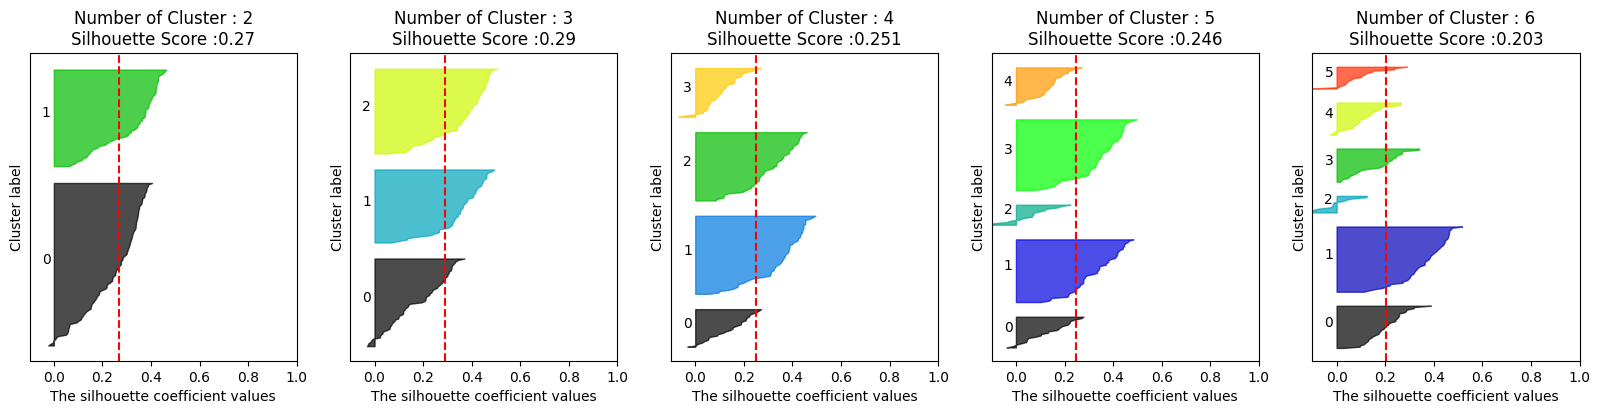

In [16]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


visualize_silhouette([2,3,4,5,6], df_scaled)

### 군집별 시각화 -> 차원 축소
- pca 두 개의 축으로 나눠서 가장 데이터 특성을 나타내는 변수로 차원을 축소하는 것

In [17]:
from sklearn.decomposition import PCA

In [18]:
X=df_scaled.copy()

pca=PCA(n_components=2)
pca.fit(X)

x_pca=pca.transform(X)
x_pca

array([[ 3.35515902, -1.45980198],
       [ 2.5582972 , -0.96667468],
       [ 3.79940306, -2.72492275],
       [ 1.06189271, -0.87291302],
       [ 3.08438269, -2.08632629],
       [ 2.47898664, -1.11395313],
       [ 2.09514994, -1.61401437],
       [ 2.77120098, -0.73926074],
       [ 3.50243604, -1.24965769],
       [ 1.76950829, -0.55694   ],
       [ 2.13114742, -0.59364777],
       [ 3.49002537, -1.03844615],
       [ 4.34297405, -2.01427422],
       [ 2.33284376, -1.62569353],
       [ 2.22014783, -2.31951624],
       [ 1.93877178, -1.61334418],
       [ 3.56822907, -2.45545721],
       [ 2.1152579 , -1.05748031],
       [ 3.1534477 , -0.81285406],
       [ 1.12499547, -0.2005749 ],
       [ 2.55298694,  0.12691561],
       [ 1.65943159,  0.56464896],
       [ 1.78718411,  0.35744389],
       [ 1.05509634, -0.95428208],
       [ 1.80178533, -0.62229569],
       [ 1.24448388,  0.13807472],
       [ 2.22688017, -0.66010352],
       [ 2.27707453, -0.14672188],
       [ 2.53733913,

In [23]:
pca_df=pd.DataFrame(x_pca)
pca_df['cluster']=df_sc_sp['cluster']

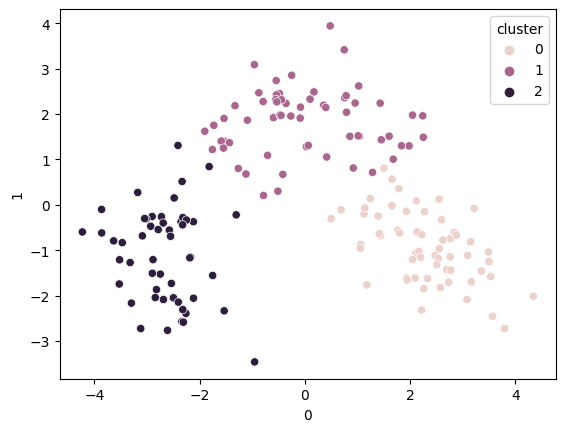

In [26]:
axs=plt.subplot()
axs=sns.scatterplot(x=0,y=1,hue='cluster',data=pca_df)